Importing relevant libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Looking at data found at [NHTSA](http://www-odi.nhtsa.dot.gov/downloads/flatfiles.cfm) and focusing on the below vehicle manufacturers

[FLAT_RCL.zip](https://www-odi.nhtsa.dot.gov/downloads/folders/Recalls/FLAT_RCL.zip) This file contains all NHTSA safety-related defect and compliance recall campaigns since 1967.<br>
[RCL.txt](https://www-odi.nhtsa.dot.gov/downloads/folders/Recalls/RCL.txt) This file provides a list of the fields in the zipped file along with their data type and a brief description. </p>

Grouped by vehicle manufacturer and subsidiary

| HONDA |   JAGUAR   |  NISSAN  | HYUNDAI | TOYOTA | SUBARU | VOLKSWAGEN |  BMW | MAZDA | MERCEDES | MOPAR | PORSCHE | VOLVO |
|:-----:|:----------:|:--------:|:-------:|:------:|:------:|:----------:|:----:|:-----:|:--------:|:-----:|:-------:|:-----:|
| ACURA | LAND ROVER | INFINITI |   KIA   |  LEXUS |        |    AUDI    | MINI |       |          |       |         |       |

Importing data sets
data path as dp = pd.read_fwf("/path/to/directory/holding/FLAT_RCL.txt/")
fields path as fp = pd.read_fwf("/path/to/directory/holding/RCL.txt/")

Note: if the data was already formatted nicely, could use **pd.read_html** and skip downloading data to local

In [93]:

dp = pd.read_fwf("/Users/thron/vehicle recall/FLAT_RCL.txt", sep = "\t", header=None)
dp.to_csv("FLAT_RCL")
df = pd.read_csv("/Users/thron/vehicle recall/FLAT_RCL", index_col=False)


used read_fwf here as some inconsitency raised errors with other read_functions, 
<p>Now to spread out the \t delimited values

In [6]:
df

,Unnamed: 0,0
0,0,1\t02V288000\tFORD\tFOCUS\t2001\t02S41\tELECTR...
1,1,2\t02V288000\tFORD\tFOCUS\t2000\t02S41\tELECTR...
2,2,3\t02V236000\tJAYCO\tFT EAGLE 10 SG\t2003\t\tE...
3,3,4\t02V237000\tHOLIDAY RAMBLER\tADMIRAL SE\t200...
4,4,5\t02V237000\tHOLIDAY RAMBLER\tADMIRAL SE\t200...
...,...,...
211131,211131,211132\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...
211132,211132,211133\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...
211133,211133,211134\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...
211134,211134,211135\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...


# data cleaning

This is a big file, which we can do something about, but first

In [7]:
df = pd.concat((df, df['0'].str.split('\t', expand=True)), axis=1, ignore_index=True)

splits at delimiter '\t' and concats to df. Note, without concat split is view only.

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0,1\t02V288000\tFORD\tFOCUS\t2001\t02S41\tELECTR...,1,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,...,None,None,None,None,None,None,None,None,None,None
1,1,2\t02V288000\tFORD\tFOCUS\t2000\t02S41\tELECTR...,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,...,None,None,None,None,None,None,None,None,None,None
2,2,3\t02V236000\tJAYCO\tFT EAGLE 10 SG\t2003\t\tE...,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",...,None,None,None,None,None,None,None,None,None,None
3,3,4\t02V237000\tHOLIDAY RAMBLER\tADMIRAL SE\t200...,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,,STRUCTURE,MONACO COACH CORP.,...,None,None,None,None,None,None,None,None,None,None
4,4,5\t02V237000\tHOLIDAY RAMBLER\tADMIRAL SE\t200...,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,,STRUCTURE,MONACO COACH CORP.,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211131,211131,211132\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...,211132,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",...,Galley Cabinet Base for Stovetop and Oven,"1. 969455-01 STD Oven, 2. 969455-02 STD Oven, ...",None,None,None,None,None,None,None,None
211132,211132,211133\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...,211133,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",...,Galley Cabinet Base for Oven,"1. 969435-01 Convection, 2. 969435-02 Convection",None,None,None,None,None,None,None,None
211133,211133,211134\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...,211134,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",...,Galley Cabinet Base for Oven,"1. 969431-01 STD Oven FC, 2. 969431-02 STD Oven",None,None,None,None,None,None,None,None
211134,211134,211135\t21V345000\tAIRSTREAM\tFLYING CLOUD\t20...,211135,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",...,Galley Cabinet Base,"1. 969448-01 STD Oven, 2. 969448-02 Convection...",None,None,None,None,None,None,None,None


In [9]:
df.drop(columns=[0,1,2], inplace=True) 

Split leaves original cols in place, so dropping redundancies
Also dropping record number, because it won't be sequential once extraneous manufacturers are dropped

In [10]:
df

,3,4,5,6,7,8,9,10,11,12,...,27,28,29,30,31,32,33,34,35,36
0,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719,20010531,V,...,None,None,None,None,None,None,None,None,None,None
1,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719,20010531,V,...,None,None,None,None,None,None,None,None,None,None
2,02V236000,JAYCO,FT EAGLE 10 SG,2003,,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730,20020813,V,...,None,None,None,None,None,None,None,None,None,None
3,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,,STRUCTURE,MONACO COACH CORP.,,,V,...,None,None,None,None,None,None,None,None,None,None
4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,,STRUCTURE,MONACO COACH CORP.,,,V,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211131,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",,,V,...,Galley Cabinet Base for Stovetop and Oven,"1. 969455-01 STD Oven, 2. 969455-02 STD Oven, ...",None,None,None,None,None,None,None,None
211132,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",,,V,...,Galley Cabinet Base for Oven,"1. 969435-01 Convection, 2. 969435-02 Convection",None,None,None,None,None,None,None,None
211133,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",,,V,...,Galley Cabinet Base for Oven,"1. 969431-01 STD Oven FC, 2. 969431-02 STD Oven",None,None,None,None,None,None,None,None
211134,21V345000,AIRSTREAM,FLYING CLOUD,2020,,EQUIPMENT:APPLIANCE:OVEN/STOVE/COOKTOP,"Airstream, Inc.",,,V,...,Galley Cabinet Base,"1. 969448-01 STD Oven, 2. 969448-02 Convection...",None,None,None,None,None,None,None,None


dropping irrelevant car manufacturers, reducing data usage and improving readability:

In [11]:
dt_list = ['BMW', 'MINI', 'MERCEDES', 'LEXUS', 'NISSAN', 'INFINITI', 'AUDI', 'KIA', 'VOLKSWAGEN', 'MAZDA', 'HYUNDAI', 'LAND ROVER',
           'VOLVO', 'HONDA', 'JAGUAR', 'ACURA', 'TOYOTA', 'MOPAR', "SUBARU", "PORSCHE"]

In [12]:
df2 = df[df[4].isin(dt_list)] #I like to preserve dfs for ease of revision

In [13]:
df2

,3,4,5,6,7,8,9,10,11,12,...,27,28,29,30,31,32,33,34,35,36
48,02V250000,HONDA,FSC600,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,...,None,None,None,None,None,None,None,None,None,None
49,02V250000,HONDA,SILVER WING,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,...,None,None,None,None,None,None,None,None,None,None
67,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004,20060128,V,...,None,None,None,None,None,None,None,None,None,None
97,02V037005,VOLVO,WX,2000,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,...,None,None,None,None,None,None,None,None,None,None
98,02V037005,VOLVO,WX,1999,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211016,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,...,"Module, Antilock Brake System Control",68477878AC,None,None,None,None,None,None,None,None
211017,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,...,"Module, Antilock Brake System Control",68477878AB,None,None,None,None,None,None,None,None
211018,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,...,"Module, Antilock Brake System Control",68453770AD,None,None,None,None,None,None,None,None
211019,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,...,"Module, Antilock Brake System Control",68453770AC,None,None,None,None,None,None,None,None


In [14]:
pd.set_option('display.max_columns', None) #full column view

In [15]:
df2.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
48,02V250000,HONDA,FSC600,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,2454,20020927,MFR,Honda (American Honda Motor Co.),20020917,20020917,,,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106390000000309,None,None,None,None,None,None,None,None,None,None,None
49,02V250000,HONDA,SILVER WING,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,2454,20020927,MFR,Honda (American Honda Motor Co.),20020917,20020917,,,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106389000000309,None,None,None,None,None,None,None,None,None,None,None
67,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004,20060128,V,906,20060227,MFR,"Volkswagen Group of America, Inc.",20060209,20060214,571,110,CERTAIN PASSENGER VEHICLES EQUIPPED WITH 17-IN...,A MISPRINTED LABEL COULD LEAD TO FITMENT OF I...,OWNERS WILL BE PROVIDED WITH A NEW TIRE INFORM...,VOLKSWAGEN RECALL NO. M8.CUSTOMERS MAY ALSO CO...,000022568000222738000000349,None,None,None,None,None,None,None,None,None,None,None
97,02V037005,VOLVO,WX,2000,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,19915,20020725,MFR,Volvo Trucks North America,20020815,20020815,,,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106287000000020,None,None,None,None,None,None,None,None,None,None,None
98,02V037005,VOLVO,WX,1999,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,19915,20020725,MFR,Volvo Trucks North America,20020815,20020815,,,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106286000000020,None,None,None,None,None,None,None,None,None,None,None


Double check that cols 29-36 are not empty. Likely not relevant, but keep for now.
Two ways, to go through each seemingly empty cols, and to display sum of all null values in any df, isnull + sum most efficient here

In [16]:
df2[36].empty

False

In [17]:
df2.isnull().sum()

3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22      725
23      877
24     3869
25     8230
26    23058
27    23179
28    23923
29    31621
30    31621
31    31621
32    31637
33    31638
34    31638
35    31638
36    31638
dtype: int64

**Observation:** the total rows are 31,782, so no empty cols. **Note:** also down from 211,136 rows

Renaming columns with original "fields" for consistency from RCL.txt file, **but in correct order**

In [304]:
#Used RCL.txt file and figured it out from there:
    
#Field#   Name                Type/Size   Description                      
#------   ---------           ---------   --------------------------------------
#1        RECORD_ID           NUMBER(9)   RUNNING SEQUENCE NUMBER, 
#                                         WHICH UNIQUELY IDENTIFIES THE RECORD.
#2        CAMPNO              CHAR(12)    NHTSA CAMPAIGN NUMBER
#3        MAKETXT             CHAR(25)    VEHICLE/EQUIPMENT MAKE
#4        MODELTXT            CHAR(256)   VEHICLE/EQUIPMENT MODEL
#5        YEARTXT             CHAR(4)     MODEL YEAR, 9999 IF UNKNOWN or N/A
#6        MFGCAMPNO           CHAR(20)    MFR CAMPAIGN NUMBER
#7        COMPNAME            CHAR(256)   COMPONENT DESCRIPTION
#8        MFGNAME             CHAR(40)    MANUFACTURER THAT FILED DEFECT/NONCOMPLIANCE REPORT
#9        BGMAN               CHAR(8)     BEGIN DATE OF MANUFACTURING
#10       ENDMAN              CHAR(8)     END DATE OF MANUFACTURING
#11       RCLTYPECD           CHAR(4)     VEHICLE, EQUIPMENT OR TIRE REPORT
#12       POTAFF              NUMBER(9)   POTENTIAL NUMBER OF UNITS AFFECTED               
#13       ODATE               CHAR(8)     DATE OWNER NOTIFIED BY MFR
#14       INFLUENCED_BY       CHAR(4)     RECALL INITIATOR (MFR/OVSC/ODI)
#15       MFGTXT              CHAR(40)    MANUFACTURERS OF RECALLED VEHICLES/PRODUCTS
#16       RCDATE              CHAR(8)     REPORT RECEIVED DATE
#17       DATEA               CHAR(8)     RECORD CREATION DATE
#18       RPNO                CHAR(3)     REGULATION PART NUMBER
#19       FMVSS               CHAR(10)    FEDERAL MOTOR VEHICLE SAFETY STANDARD NUMBER
#20       DESC_DEFECT         CHAR(2000)  DEFECT SUMMARY
#21       CONEQUENCE_DEFECT   CHAR(2000)  CONSEQUENCE SUMMARY	
#22       CORRECTIVE_ACTION   CHAR(2000)  CORRECTIVE SUMMARY
#23       NOTES               CHAR(2000)  RECALL NOTES
#24       RCL_CMPT_ID         CHAR(27)    NUMBER THAT UNIQUELY IDENTIFIES A RECALLED COMPONENT.
#25       MFR_COMP_NAME       CHAR(50)    MANUFACTURER-SUPPLIED COMPONENT NAME
#26       MFR_COMP_DESC       CHAR(200)   MANUFACTURER-SUPPLIED COMPONENT DESCRIPTION
#27       MFR_COMP_PTNO       CHAR(100)   MANUFACTURER-SUPPLIED COMPONENT PART NUMBER

In [18]:
df2 = df2.rename({3: "CAMPNO", 4: "MAKETXT", 5: "MODELTXT", 6:"YEARTXT", 8: "COMPNAME", 9:"MFGNAME", 10: "BGMAN", 11: "ENDMAN", 12: "RCLTYPECD ", 13: "POTAFF", 14: "ODATE", 15: "INFLUENCED_BY", 16: "MFGTXT", 17:"RCDATE", 18: "DATEA", 19: "RPNO", 20: "FMVSS", 21: "DESC_DEFECT", 22:"CONEQUENCE_DEFECT", 23: "CORRECTIVE_ACTION", 24: "NOTES", 25: "RCL_CMPT_ID", 26: "MFR_COMP_PTNO"}, axis=1)  
                                

In [435]:
df2

,CAMPNO,MAKETXT,MODELTXT,YEARTXT,7,COMPNAME,MFGNAME,BGMAN,ENDMAN,RCLTYPECD,POTAFF,ODATE,INFLUENCED_BY,MFGTXT,RCDATE,DATEA,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_PTNO,27,28,29,30,31,32,33,34,35,36
48,02V250000,HONDA,FSC600,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,2454,20020927,MFR,Honda (American Honda Motor Co.),20020917,20020917,,,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106390000000309,None,None,None,None,None,None,None,None,None,None,None
49,02V250000,HONDA,SILVER WING,2002,,WHEELS,AMERICAN HONDA MOTOR CO.,20010808,20020708,V,2454,20020927,MFR,Honda (American Honda Motor Co.),20020917,20020917,,,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106389000000309,None,None,None,None,None,None,None,None,None,None,None
67,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004,20060128,V,906,20060227,MFR,"Volkswagen Group of America, Inc.",20060209,20060214,571,110,CERTAIN PASSENGER VEHICLES EQUIPPED WITH 17-IN...,A MISPRINTED LABEL COULD LEAD TO FITMENT OF I...,OWNERS WILL BE PROVIDED WITH A NEW TIRE INFORM...,VOLKSWAGEN RECALL NO. M8.CUSTOMERS MAY ALSO CO...,000022568000222738000000349,None,None,None,None,None,None,None,None,None,None,None
97,02V037005,VOLVO,WX,2000,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,19915,20020725,MFR,Volvo Trucks North America,20020815,20020815,,,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106287000000020,None,None,None,None,None,None,None,None,None,None,None
98,02V037005,VOLVO,WX,1999,,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614,20000831,V,19915,20020725,MFR,Volvo Trucks North America,20020815,20020815,,,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106286000000020,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211016,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,1451,,MFR,"Chrysler (FCA US, LLC)",20220310,20220310,,126,"Chrysler (FCA US, LLC) is recalling certain Mo...",An ESC malfunction indicator light that fails ...,"Dealers will update the software, repurchase, ...",Owners may also contact the National Highway T...,000118968005243749000001145,Antilock Brake System Control Module,"Module, Antilock Brake System Control",68477878AC,None,None,None,None,None,None,None,None
211017,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,1451,,MFR,"Chrysler (FCA US, LLC)",20220310,20220310,,126,"Chrysler (FCA US, LLC) is recalling certain Mo...",An ESC malfunction indicator light that fails ...,"Dealers will update the software, repurchase, ...",Owners may also contact the National Highway T...,000118968005243749000001145,Antilock Brake System Control Module,"Module, Antilock Brake System Control",68477878AB,None,None,None,None,None,None,None,None
211018,22E017000,MOPAR,ABS CONTROL MODULE,9999,Z25,ELECTRONIC STABILITY CONTROL,"Chrysler (FCA US, LLC)",,,E,1451,,MFR,"Chrysler (FCA US, LLC)",20220310,20220310,,126,"Chrysler (FCA US, LLC) is recalling certain Mo...",An ESC malfunction indicator light that f

Note: it seems many cols can be dropped, if focus remains as assigned

## Data Visualization and Analysis

### total recall campaigns by manufacturer

**Note:** While several of the manufacturers are subsidiaries of others, this will treat all as individual because not all linked makes have correlating recalls.

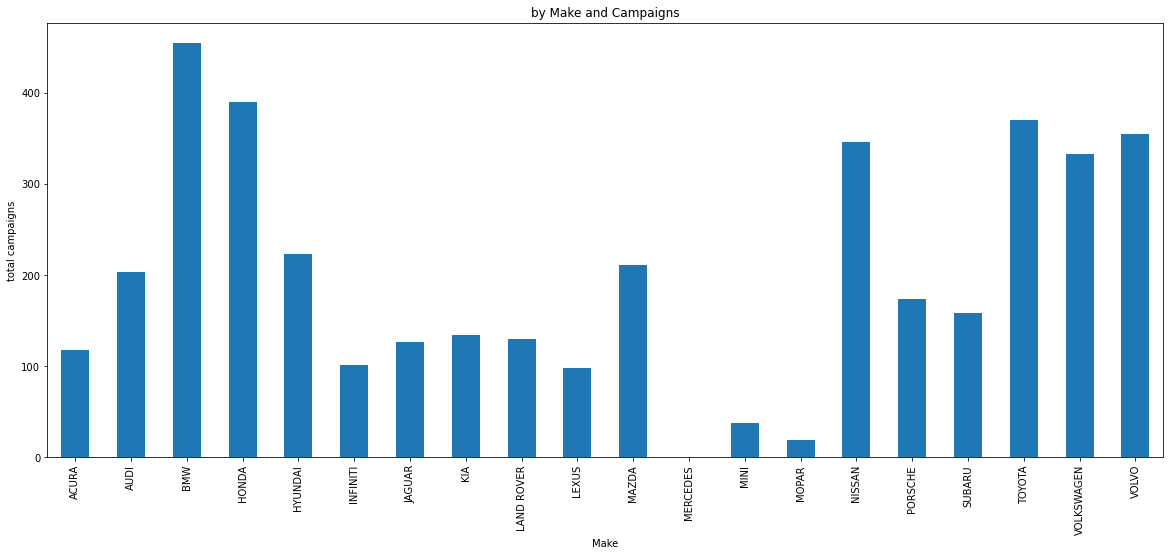

In [19]:
#campaigns are counted once total, so various makes and models are grouped/counted as one
mc = df2.groupby(['MAKETXT']).nunique()['CAMPNO'].plot(kind = "bar",figsize=(20, 8), title='by Make and Campaigns',
             xlabel='Make', ylabel='total campaigns') 

Numerical data of the same

In [30]:
 #total unique recall campaigns
mccnt = df2.groupby(['MAKETXT']).nunique()['CAMPNO'].sort_values(ascending=False)

In [653]:
mccnt 

MAKETXT
BMW           454
HONDA         390
TOYOTA        370
VOLVO         354
NISSAN        346
VOLKSWAGEN    333
HYUNDAI       223
MAZDA         211
AUDI          203
PORSCHE       174
SUBARU        158
KIA           134
LAND ROVER    130
JAGUAR        127
ACURA         118
INFINITI      101
LEXUS          98
MINI           38
MOPAR          19
MERCEDES        1
Name: CAMPNO, dtype: int64

Above: total unique campaigns in **mc** and **mccnt**, grouped by potential vehicle manufacturer (MAKETXT)  with unique campaign number (CAMPNO) as count

In [80]:
#total potentially affected vehicles ('POTAFF') per unique recall campaign
pva = df2.groupby(['MAKETXT','CAMPNO','POTAFF'])['POTAFF'].nunique().cumsum() 


In [81]:
pva

MAKETXT  CAMPNO     POTAFF
ACURA    01V053000  47158        1
         01V161000  10575        2
         01V166001  9034         3
         01V166002  8168         4
         02V080000  2900         5
                              ... 
VOLVO    99V235000  139588    3978
         99V236000  124381    3979
         99V240000  166       3980
         99V274000  59        3981
         99V296001  20        3982
Name: POTAFF, Length: 3982, dtype: int64

# Patterns or trends observed:

Recalls cause delay in sales/service of tires, et al. From the recall data, my initial observations are:
* The number of cars affected in recalls can range from less than 100 to hundreds of thousands.
* Some higher end vehicles have less recall issues than others. This may also be worth comparing to overall purchase totals of vehicles. It would be relevant to compare recalls that involve issues that could cause bodily harm, vs not.
* It would be particularly interesting to compare models that had multiple recalls, perhaps vs models that did not, again vis a vis severity of danger.
* Overall, nothing statistically significant that would predict future trends.

**Additional tools for recall strategies:**

A comprehensive study on vehicle manufacturer recalls using analytics
[https://www.lexjansen.com/sugi/sgf2017/1164-2017.pdf](https://www.lexjansen.com/sugi/sgf2017/1164-2017.pdf)

Rather than learning through recall announcements, use ML to identify potential recalls by reviews in closer to real time. This may allow for pivot or strategy:  
[Identifying Leading Indicators of Product Recalls from Online Reviews
Using Positive Unlabeled Learning and Domain Adaptation](http://www.cs.iit.edu/~culotta/pubs/bhat17identifying.pdf)


Sources

[Vehicle Recalls Study on iseecars.com](https://www.iseecars.com/vehicle-recalls-study)
    